# Aplicación de Machine Learning en el Conjunto de Datos Iris

Descargar el conjunto de datos desde Kaggle mediante el siguiente 
enlace: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

## Carga y Visualización del Conjunto de Datos Iris

Este segmento de código importa bibliotecas necesarias para ejecutar este proyecto.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

Carga el conjunto de datos Iris desde un archivo CSV. El conjunto de datos se imprime para inspeccionar su estructura.

In [17]:
iris_dataset = pd.read_csv("IRIS.csv")
print(iris_dataset)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


## Gráfico de Dispersión: Longitud del Sépalo vs Ancho del Sépalo

Se crea un gráfico de dispersión para visualizar la relación entre la longitud del sépalo y el ancho del sépalo, con diferentes especies representadas por diferentes colores.

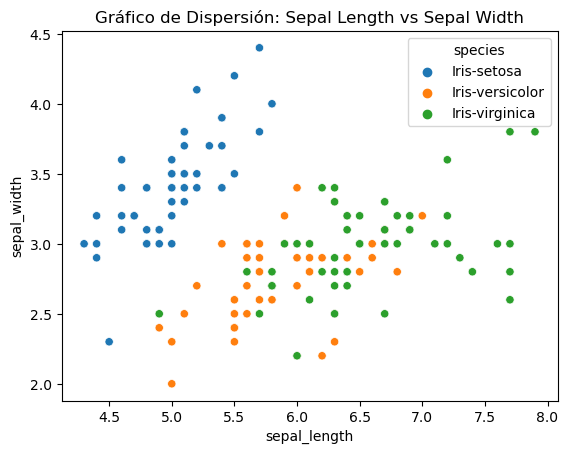

In [18]:
# Gráfico de dispersión para sepal_length y sepal_width
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_dataset)
plt.title('Gráfico de Dispersión: Sepal Length vs Sepal Width')
plt.show()

## Análisis Visual de las Especies de Iris mediante Pairplot

Este código utiliza la biblioteca Seaborn para crear un pairplot que visualiza las relaciones entre las características del conjunto de datos de iris. Cada punto se coloreará según la especie a la que pertenezca, lo que facilita la identificación de patrones y tendencias entre las diferentes especies. El gráfico proporciona una visión completa de las relaciones bidireccionales entre las variables, lo que puede ser crucial para entender las características distintivas de cada especie de iris.


c:\Users\kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

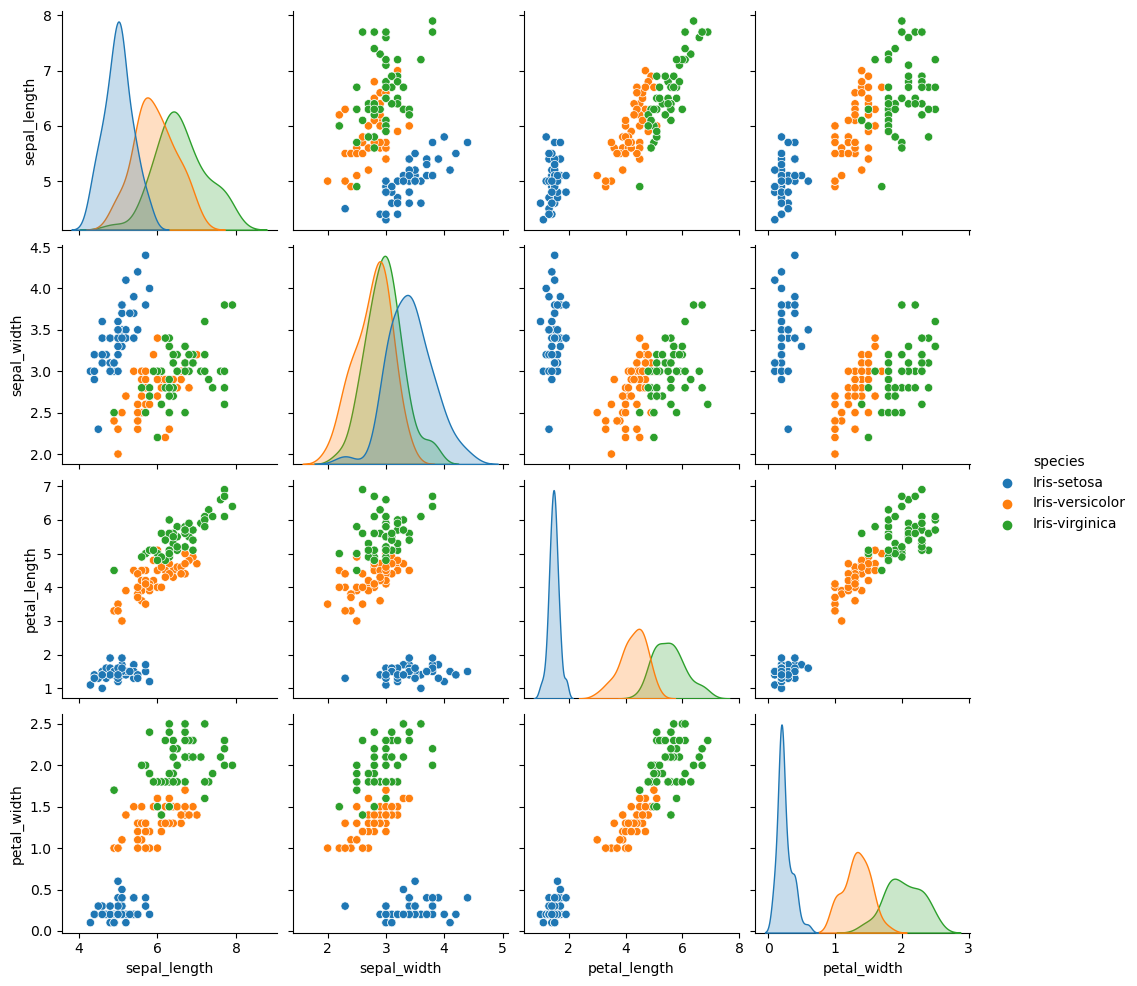

<Figure size 1000x1000 with 0 Axes>

In [19]:
sns.pairplot(iris_dataset, hue="species")
plt.figure(figsize=(10, 10))
plt.show()

## Histograma: Longitud del Pétalo

Este código genera un histograma para la longitud del pétalo, con distribuciones separadas para cada especie. La estimación de la densidad del núcleo (KDE) se incluye para una representación más suave.

c:\Users\kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


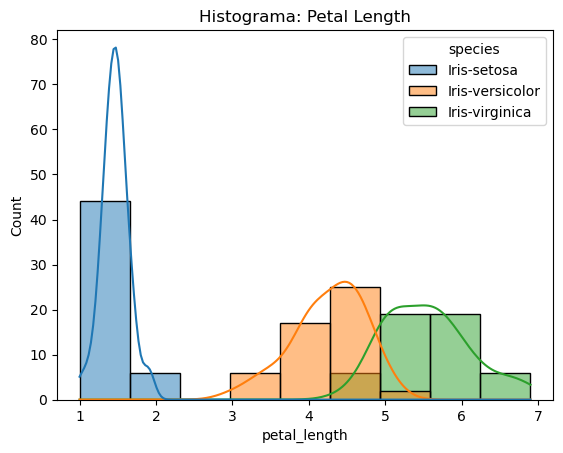

In [20]:
# Histograma para petal_length
sns.histplot(data=iris_dataset, x='petal_length', hue='species', kde=True)
plt.title('Histograma: Petal Length')
plt.show()

## Implementación del Algoritmo de Vecinos Más Cercanos (KNN)

Esta sección define una clase de clasificador KNN (Vecinos Más Cercanos) simple con métodos para ajustar el modelo, predecir y calcular distancias.

In [21]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = self.calculate_distances(x)
            indices = self.get_indices_of_k_nearest_neighbors(distances)
            k_nearest_labels = self.get_labels_from_indices(indices)
            prediction = self.perform_majority_voting(k_nearest_labels)
            predictions.append(prediction)
        return predictions

    def calculate_distances(self, x):
        distances = []
        for x_train in self.X_train:
            distance = self.calculate_euclidean_distance(x, x_train)
            distances.append(distance)
        return distances
    
    def calculate_euclidean_distance(self, a, b):
        distance = 0
        for x, y in zip(a, b):
            distance += (x - y) ** 2
        return distance ** 0.5

    def get_indices_of_k_nearest_neighbors(self, distances):
        indices = sorted(range(len(distances)), key=lambda i: distances[i])[:self.k]
        return indices

    def get_labels_from_indices(self, indices):
        labels = []
        for i in indices:
            label = self.y_train[i]
            labels.append(label)
        return labels

    def perform_majority_voting(self, labels):
        counts = {}
        for label in labels:
            counts[label] = counts.get(label, 0) + 1
        return max(counts, key=counts.get)

## Dividir el Conjunto de Datos y Entrenar el Modelo KNN

El conjunto de datos Iris se divide en conjuntos de entrenamiento y prueba. El código luego procede a entrenar modelos KNN para varios valores de k.

In [29]:
X = iris_dataset.drop("species", axis=1)  # Features
y = iris_dataset["species"]  # Target labels

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42, shuffle=True)

## Calcular Precisión para Diferentes Valores de k

La precisión del modelo KNN se calcula e imprime para diferentes valores de k (1-100)

In [30]:
# Rango de valores de K a probar
k_values = range(1, 100)

# Lista para almacenar los valores de precisión
accuracy_list = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_list.append(accuracy)
    print(f"Accuracy for k = {k}: {accuracy:.4f}")


Accuracy for k = 1: 1.0000
Accuracy for k = 2: 1.0000
Accuracy for k = 3: 1.0000
Accuracy for k = 4: 1.0000
Accuracy for k = 5: 1.0000
Accuracy for k = 6: 1.0000
Accuracy for k = 7: 0.9667
Accuracy for k = 8: 1.0000
Accuracy for k = 9: 1.0000
Accuracy for k = 10: 1.0000
Accuracy for k = 11: 1.0000
Accuracy for k = 12: 1.0000
Accuracy for k = 13: 1.0000
Accuracy for k = 14: 1.0000
Accuracy for k = 15: 1.0000
Accuracy for k = 16: 1.0000
Accuracy for k = 17: 1.0000
Accuracy for k = 18: 1.0000
Accuracy for k = 19: 1.0000
Accuracy for k = 20: 1.0000
Accuracy for k = 21: 1.0000
Accuracy for k = 22: 1.0000
Accuracy for k = 23: 1.0000
Accuracy for k = 24: 1.0000
Accuracy for k = 25: 1.0000
Accuracy for k = 26: 1.0000
Accuracy for k = 27: 1.0000
Accuracy for k = 28: 1.0000
Accuracy for k = 29: 1.0000
Accuracy for k = 30: 1.0000
Accuracy for k = 31: 1.0000
Accuracy for k = 32: 1.0000
Accuracy for k = 33: 1.0000
Accuracy for k = 34: 1.0000
Accuracy for k = 35: 1.0000
Accuracy for k = 36: 1.0000
A

## Evaluar el Modelo KNN con una Matriz de Confusión

El código evalúa el modelo KNN con un valor específico de k (10 en este caso) e imprime la matriz de confusión, que muestra el rendimiento del modelo en el conjunto de prueba.

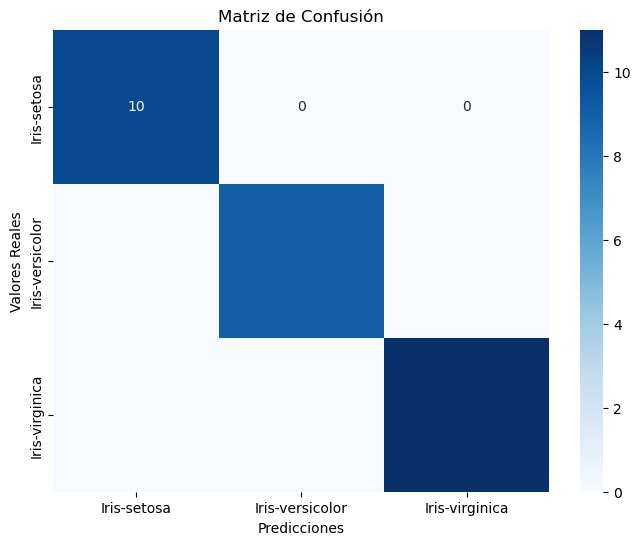

In [27]:
# Se evalúa el modelo con el valor de k que obtuvo la mejor precisión (k=10)
knn = KNN(k=10)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Se obtienen los valores únicos de las etiquetas de clase
class_labels = sorted(y.unique())

# Se crea la matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Crear un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

## Gráfico de Precisión vs Valor de k

Este código genera un gráfico que muestra la precisión del modelo KNN para diferentes valores de k. El gráfico ayuda a identificar el valor óptimo de k que produce el mejor rendimiento del modelo.

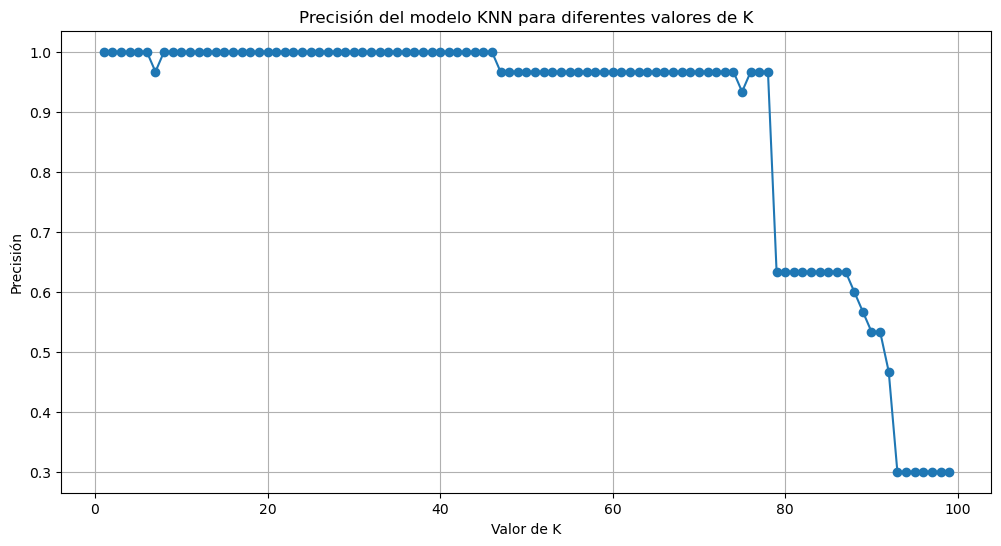

In [25]:
# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracy_list, marker='o')
plt.title('Precisión del modelo KNN para diferentes valores de K')
plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()